# 'auto-mpg.csv'에 대한 EDA를 수행 합니다.

# 문제 정의 : 자동차 연비 분석

## DataSet 구성

    1. mpg : 연비
    2. cylinders : 실린더수
    3. displacement : 배기량
    4. horsepower : 마력
    5. weight : 중량
    6. acceleration : 가속력
    7. model year : 출시년도
    8. origin : 출시국가
    9. name : 모델 이름

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 폰트 오류 문제 해결 - windows
#from matplotlib import font_manager, rc
#font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 폰트 파일 위치
#font_name = font_manager.FontProperties( fname = font_path ).get_name()
#rc( 'font', family = font_name )

# matplotlib 한글 폰트 오류 문제 해결 - mac 
from matplotlib import rc
rc( 'font', family = 'AppleGothic' )

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


## 데이터 수집

- DataFrame 생성
- DataFrame 기본 정보 확인

In [5]:
df = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/202104AI_B_Workspace/auto-mpg.csv', 
                  header = None )

# 열 이름 지정
df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model year', 'origin', 'name' ]

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.shape

(398, 9)

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [10]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## 데이터 전처리

### horsepower 변수 자료형 변경( object -> float )

In [11]:
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
df[ 'horsepower' ].replace( '?', np.nan, inplace = True ) # '?'를 np.nan으로 변경
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True ) # 누락 데이터 행 삭제
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' ) # 문자열을 실수형으로 변환

### mpg에 대한 kpl( kilometer per liter ) 변수 추가

In [13]:
# kpl( kilometer per liter ) 단위 변수 추가
mpg_to_kpl = 1.60934 / 3.7541

# 데이터 표준화를 위한 변수 추가
df[ 'kpl' ] = df[ 'mpg' ] * mpg_to_kpl

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...,7.716395
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.430330
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.716395
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.859018
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.287707


### origin 내용을 국가명으로 변경 및 타입 변환( int64 -> category )

In [15]:
print( df[ 'origin' ].dtypes )
print()
print( df[ 'origin' ].unique() )

int64

[1 3 2]


In [16]:
df[ 'origin' ].replace( { 1: 'USA', 2: 'EU', 3: 'JPN' }, inplace = True )

In [17]:
df[ 'origin' ] = df[ 'origin' ].astype( 'category' ) # 'origin'변수를 범주형으로 변환

In [18]:
print( df[ 'origin' ].dtypes )
print()
print( df[ 'origin' ].unique() )

category

['USA', 'JPN', 'EU']
Categories (3, object): ['USA', 'JPN', 'EU']


### model year 변수 타입 변경( int64 -> category )

In [19]:
df[ 'model year' ] = df[ 'model year' ].astype( 'category' )
df[ 'model year' ].dtypes

CategoricalDtype(categories=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], ordered=False)

### cylinders 변수 타입 변경( int64 -> category )

In [20]:
df[ 'cylinders' ] = df[ 'cylinders' ].astype( 'category' )
df[ 'cylinders' ].dtypes

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False)

In [21]:
df.describe()

,mpg,displacement,horsepower,weight,acceleration,kpl
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,10.050999
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.345918
min,9.000000,68.000000,46.000000,1613.000000,8.000000,3.858198
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,7.287707
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,9.752666
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,12.431970
max,46.600000,455.000000,230.000000,5140.000000,24.800000,19.976890


### 결측치 확인

In [22]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
kpl             0
dtype: int64

### 이상치 확인

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


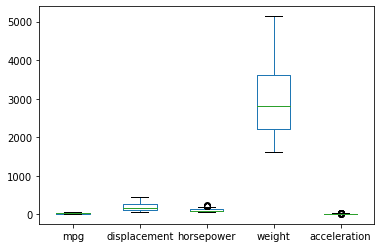

In [23]:
df[ [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ] ].plot( kind = 'box' )

## EDA

### 연비

In [24]:
print( '평균 연비 : {:6.2f} mpg ( {:6.2f} kpl )'.format( df[ 'mpg' ].mean(), 
                                                        df[ 'kpl'].mean() ) )
print( '최고 연비 : {:6.2f} mpg ( {:6.2f} kpl )'.format( df[ 'mpg' ].max(),
                                                        df[ 'kpl'].max()) )
print( '최소 연비 : {:6.2f} mpg ( {:6.2f} kpl )'.format( df[ 'mpg' ].min(),
                                                        df[ 'kpl'].min()) )

평균 연비 :  23.45 mpg (  10.05 kpl )
최고 연비 :  46.60 mpg (  19.98 kpl )
최소 연비 :   9.00 mpg (   3.86 kpl )


### 최고 연비 모델

In [25]:
df[ df.mpg >= df.mpg.max() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
322,46.6,4,86.0,65.0,2110.0,17.9,80,JPN,mazda glc,19.97689


### 최소 연비 모델

In [26]:
df[ df.mpg <= df.mpg.min() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
28,9.0,8,304.0,193.0,4732.0,18.5,70,USA,hi 1200d,3.858198


### 연비 분포

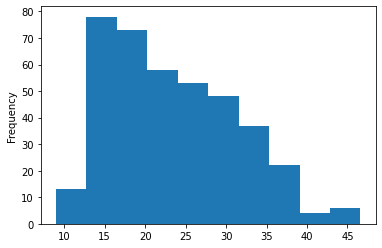

In [27]:
df.mpg.plot( kind = 'hist' )

### 마력

In [28]:
print( '평균 마력 : {:6.2f}'.format( df[ 'horsepower' ].mean() ) )
print( '최고 마력 : {:6.2f}'.format( df[ 'horsepower' ].max() ) )
print( '최소 마력 : {:6.2f}'.format( df[ 'horsepower' ].min() ) )

평균 마력 : 104.47
최고 마력 : 230.00
최소 마력 :  46.00


### 최고 마력 모델

In [29]:
df[ df.horsepower >= df.horsepower.max() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
116,16.0,8,400.0,230.0,4278.0,9.5,73,USA,pontiac grand prix,6.859018


### 최소 마력 모델

In [30]:
df[ df.horsepower <= df.horsepower.min() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
19,26.0,4,97.0,46.0,1835.0,20.5,70,EU,volkswagen 1131 ...,11.145904
102,26.0,4,97.0,46.0,1950.0,21.0,73,EU,volkswagen super...,11.145904


### 마력 분포

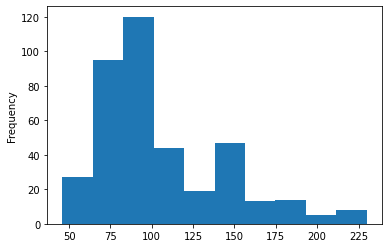

In [31]:
df.horsepower.plot( kind = 'hist' )

### 마력에 따른 출력 구분

In [32]:
count, bin_dividers = np.histogram( df[ 'horsepower' ], bins = 3 )

bin_names = [ '저출력', '보통출력', '고출력' ]

df[ 'hp_bin' ] = pd.cut( x = df[ 'horsepower' ],
                         bins = bin_dividers,
                         labels = bin_names,
                         include_lowest = True )

In [33]:
df.hp_bin.value_counts()

저출력      257
보통출력    103
고출력       32
Name: hp_bin, dtype: int64

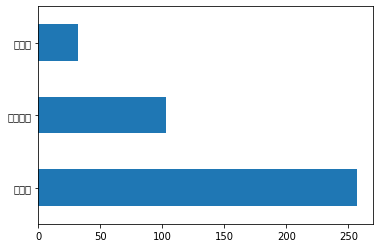

In [34]:
df.hp_bin.value_counts().plot( kind = 'barh' )

### 중량

In [35]:
print( '평균 중량 : {:6.2f}'.format( df[ 'weight' ].mean() ) )
print( '최고 중량 : {:6.2f}'.format( df[ 'weight' ].max() ) )
print( '최소 중량 : {:6.2f}'.format( df[ 'weight' ].min() ) )

평균 중량 : 2977.58
최고 중량 : 5140.00
최소 중량 : 1613.00


### 최고 중량 모델

In [36]:
df[ df.weight >= df.weight.max() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
44,13.0,8,400.0,175.0,5140.0,12.0,71,USA,pontiac safari (sw),5.572952,고출력


### 최소 중량 모델

In [37]:
df[ df.weight <= df.weight.min() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
54,35.0,4,72.0,69.0,1613.0,18.0,71,JPN,datsun 1200,15.004102,저출력


### 중량 분포

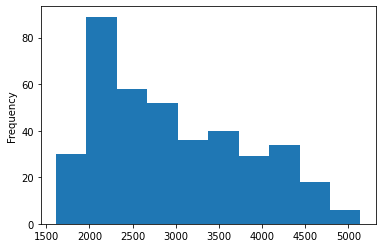

In [38]:
df.weight.plot( kind = 'hist' )

### 배기량

In [39]:
print( '평균 배기량 : {:6.2f}'.format( df[ 'displacement' ].mean() ) )
print( '최고 배기량 : {:6.2f}'.format( df[ 'displacement' ].max() ) )
print( '최소 배기량 : {:6.2f}'.format( df[ 'displacement' ].min() ) )

평균 배기량 : 194.41
최고 배기량 : 455.00
최소 배기량 :  68.00


### 최고 배기량 모델

In [40]:
df[ df.displacement >= df.displacement.max() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,pontiac catalina,6.001641,고출력
13,14.0,8,455.0,225.0,3086.0,10.0,70,USA,buick estate wag...,6.001641,고출력
95,12.0,8,455.0,225.0,4951.0,11.0,73,USA,buick electra 22...,5.144264,고출력


### 최소 배기량 모델

In [41]:
df[ df.displacement <= df.displacement.min() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
117,29.0,4,68.0,49.0,1867.0,19.5,73,EU,fiat 128,12.43197,저출력


### 배기량 분포

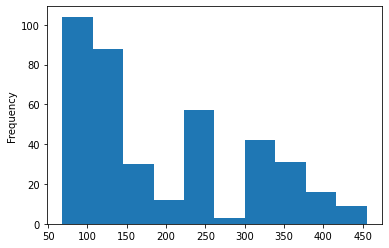

In [42]:
df.displacement.plot( kind = 'hist' )

### 가속력

In [43]:
print( '평균 가속력 : {:6.2f}'.format( df[ 'acceleration' ].mean() ) )
print( '최고 가속력 : {:6.2f}'.format( df[ 'acceleration' ].max() ) )
print( '최소 가속력 : {:6.2f}'.format( df[ 'acceleration' ].min() ) )

평균 가속력 :  15.54
최고 가속력 :  24.80
최소 가속력 :   8.00


### 최고 가속력 모델

In [44]:
df[ df.acceleration >= df.acceleration.max() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
299,27.2,4,141.0,71.0,3190.0,24.8,79,EU,peugeot 504,11.660331,저출력


### 최소 가속력 모델

In [45]:
df[ df.acceleration <= df.acceleration.min() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
11,14.0,8,340.0,160.0,3609.0,8.0,70,USA,plymouth 'cuda 340,6.001641,보통출력


### 가속력 분포

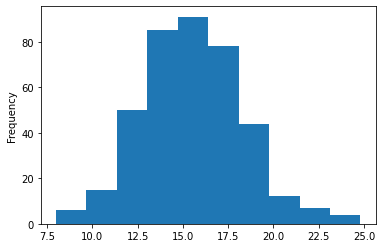

In [46]:
df.acceleration.plot( kind = 'hist' )

### 실린더수

In [47]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

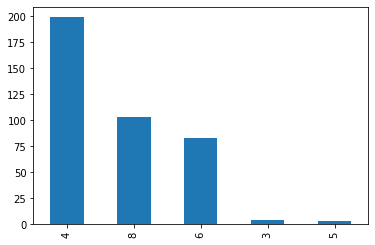

In [48]:
df.cylinders.value_counts().plot( kind = 'bar' )

### 출시년도

In [49]:
df[ 'model year' ].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

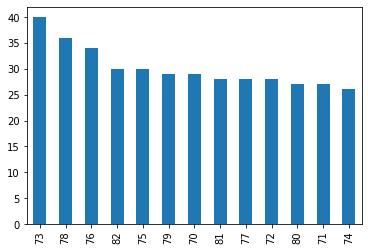

In [50]:
df[ 'model year' ].value_counts().plot( kind = 'bar' )

### 출시 국가

In [51]:
df.origin.value_counts()

USA    245
JPN     79
EU      68
Name: origin, dtype: int64

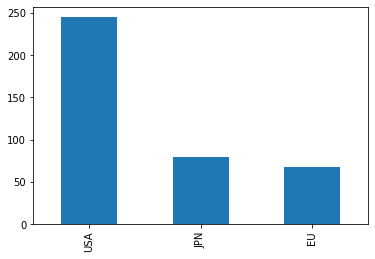

In [52]:
df.origin.value_counts().plot( kind = 'bar' )

### 출시국가별 통계

In [53]:
grouped = df.groupby( [ 'origin' ] )
average = grouped.mean()
average

,mpg,displacement,horsepower,weight,acceleration,kpl
origin,,,,,,
EU,27.602941,109.632353,80.558824,2433.470588,16.794118,11.833067
JPN,30.450633,102.708861,79.835443,2221.227848,16.172152,13.053840
USA,20.033469,247.512245,119.048980,3372.489796,14.990204,8.588121


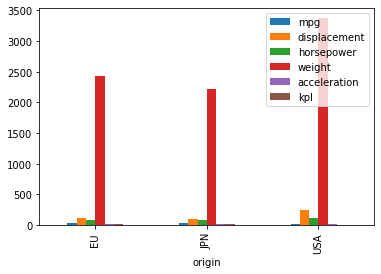

In [54]:
average.plot( kind = 'bar' )

### 출시 년도별 통계

In [55]:
grouped = df.groupby( [ 'model year' ] )
average = grouped.mean()
average

,mpg,displacement,horsepower,weight,acceleration,kpl
model year,,,,,,
70,17.689655,281.413793,147.827586,3372.793103,12.948276,7.583354
71,21.111111,213.888889,107.037037,3030.592593,15.000000,9.050093
72,18.714286,218.375000,120.178571,3237.714286,15.125000,8.022602
73,17.100000,256.875000,130.475000,3419.025000,14.312500,7.330576
74,22.769231,170.653846,94.230769,2878.038462,16.173077,9.760910
75,20.266667,205.533333,101.066667,3176.800000,16.050000,8.688090
76,21.573529,197.794118,101.117647,3078.735294,15.941176,9.248327
77,23.375000,191.392857,105.071429,2997.357143,15.435714,10.020597
78,24.061111,177.805556,99.694444,2861.805556,15.805556,10.314725


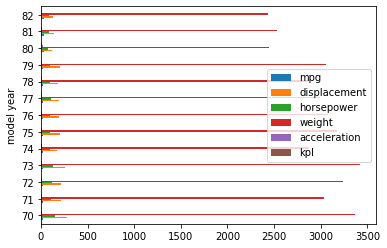

In [56]:
average.plot( kind = 'barh' )

### 모델 출시 국가 및 출시년도 통계

In [57]:
grouped = df.groupby( [ 'origin', 'model year' ] )
average = grouped.mean()
average

mpg  displacement  horsepower       weight  \
origin model year                                                     
EU     70          25.200000    107.800000   86.200000  2309.200000   
       71          28.750000     95.000000   74.000000  2024.000000   
       72          22.000000    111.000000   79.600000  2573.200000   
       73          24.000000    105.000000   81.857143  2335.714286   
       74          27.000000     93.166667   74.166667  2139.333333   
       75          24.500000    109.500000   89.500000  2571.166667   
       76          24.250000    116.125000   87.625000  2611.000000   
       77          29.250000     98.500000   81.000000  2138.750000   
       78          24.950000    126.166667   99.166667  2691.666667   
       79          30.450000    126.000000   72.000000  2693.750000   
       80          36.837500    106.625000   66.750000  2412.125000   
       81          30.600000    130.333333   76.666667  2860.000000   
       82          40.000000    101.000000   63.000000  2055.000000   
JPN    70          25.500000    105.000000   91.500000  2251.000000   
       71          29.500000     88.250000   79.250000  1936.000000   
       72          24.200000     99.400000   93.800000  2300.400000   
       73          20.000000    107.750000   98.500000  2397.250000   
       74          29.333333     89.500000   72.500000  2053.000000   
       75          27.500000    110.250000   80.250000  2303.250000   
       76          28.000000    107.250000   76.500000  2217.500000   
       77          27.416667    100.500000   81.166667  2295.833333   
       78          29.687500    107.250000   79.250000  2221.250000   
       79          32.950000     85.500000   65.000000  1997.500000   
       80          35.400000    104.615385   78.846154  2290.307692   
       81          32.958333    107.500000   78.333333  2269.166667   
       82          34.888889    103.777778   74.000000  2132.777778   
USA    70          15.272727    336.909091  166.954545  3716.500000   
       71          17.736842    265.368421  119.842105  3472.947368   
       72          16.277778    281.250000  138.777778  3682.666667   
       73          15.034483    314.103448  146.620690  3821.448276   
       74          18.142857    238.642857  112.142857  3548.214286   
       75          17.550000    253.400000  108.700000  3533.200000   
       76          19.431818    243.954545  110.500000  3405.409091   
       77          20.722222    242.333333  118.388889  3422.000000   
       78          21.772727    217.545455  107.272727  3141.136364   
       79          23.478261    231.260870  109.434783  3210.217391   
       80          26.300000    153.500000   88.833333  2808.666667   
       81          27.530769    164.846154   84.538462  2695.000000   
       82          29.789474    142.526316   86.947368  2616.842105   

                   acceleration        kpl  
origin model year                           
EU     70             16.500000  10.802954  
       71             16.750000  12.324798  
       72             18.700000   9.431150  
       73             16.428571  10.288527  
       74             15.333333  11.574593  
       75             15.083333  10.502872  
       76             16.050000  10.395699  
       77             15.000000  12.539143  
       78             16.233333  10.695781  
       79             18.400000  13.053569  
       80             18.500000  15.791818  
       81             18.066667  13.117872  
       82             19.950000  17.147545  
JPN    70             14.750000  10.931560  
       71             16.375000  12.646315  
       72             15.400000  10.374265  
       73             15.625000   8.573773  
       74             17.666667  12.574867  
       75             16.000000  11.788937  
       76             16.575000  12.003282  
       77             16.316667  11.753213  
       78             16.200000  12.726694  
       79             17.200000  

### 연비, 배기량, 마력, 중량, 가속력간 관계

In [58]:
df[ [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ] ].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


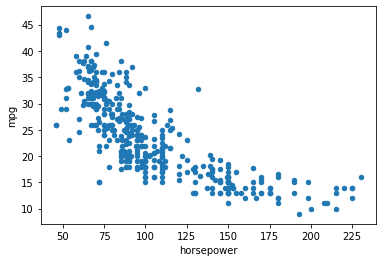

In [59]:
df.plot( x = 'horsepower', y = 'mpg', kind = 'scatter' )

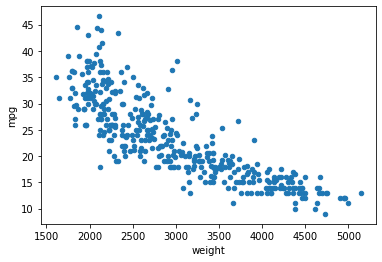

In [60]:
df.plot( x = 'weight', y = 'mpg', kind = 'scatter' )

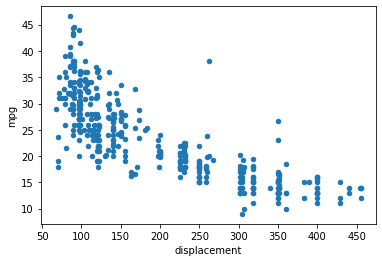

In [61]:
df.plot( x = 'displacement', y = 'mpg', kind = 'scatter' )

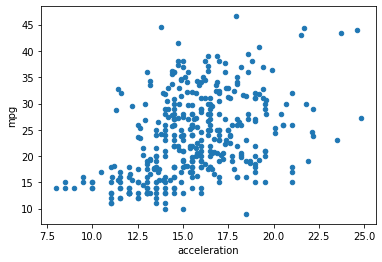

In [62]:
df.plot( x = 'acceleration', y = 'mpg', kind = 'scatter' )

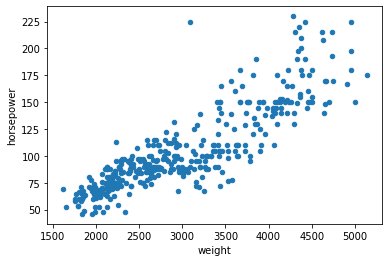

In [63]:
df.plot( x = 'weight', y = 'horsepower', kind = 'scatter' )

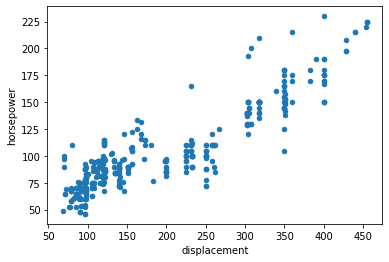

In [64]:
df.plot( x = 'displacement', y = 'horsepower', kind = 'scatter' )

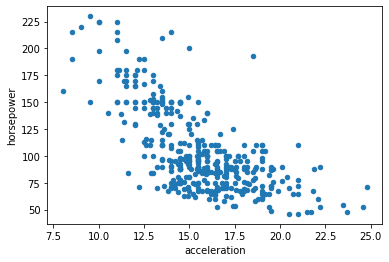

In [65]:
df.plot( x = 'acceleration', y = 'horsepower', kind = 'scatter' )

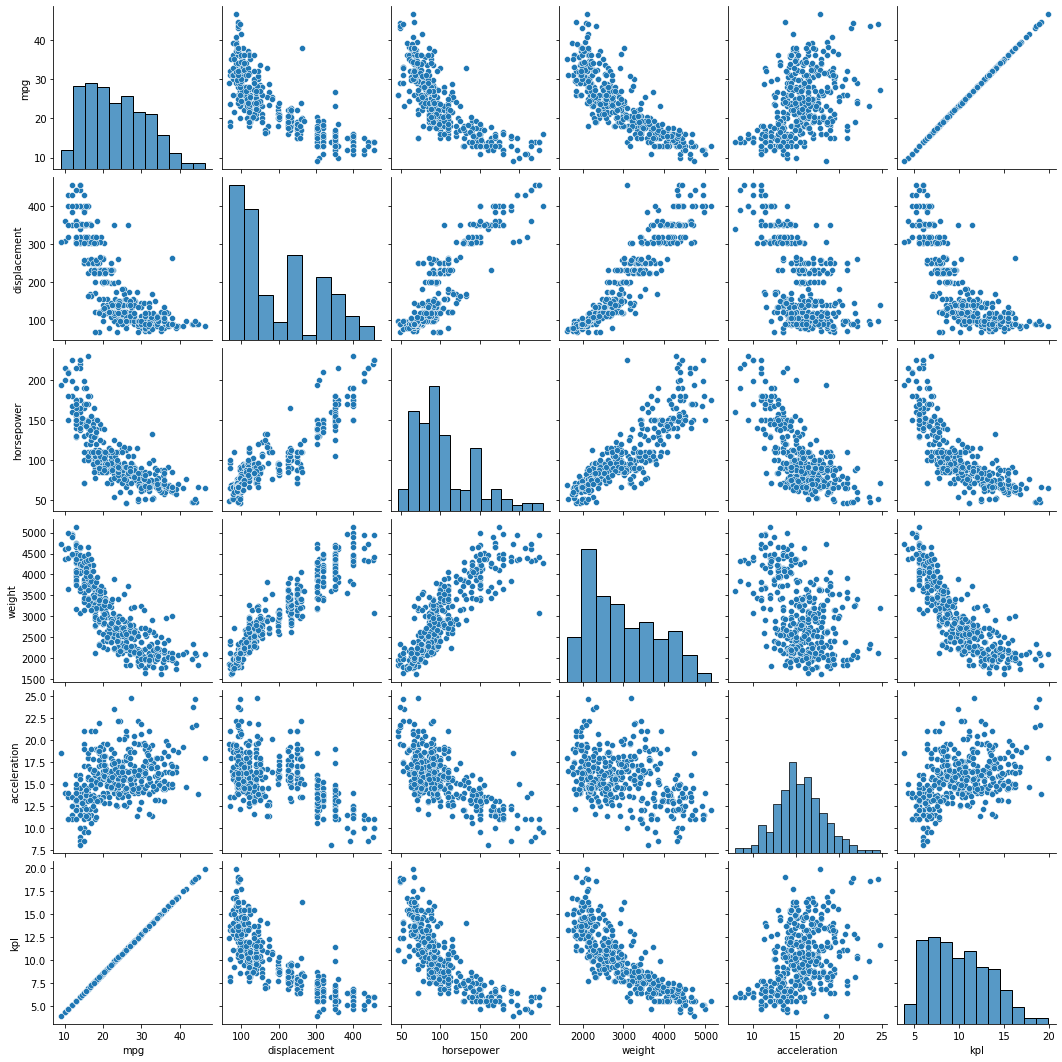

In [67]:
sns.pairplot( df )